# Reproduce detection of EPIC220565349

This target comes from priv. comm with Jeff Coughlin.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Retrieve data

### PDC

In [4]:
#! wget https://archive.stsci.edu/pub/k2/lightcurves/c8/220500000/65000/ktwo220565349-c08_llc.fits

In [5]:
#! mv ktwo220565349-c08_llc.fits ../data/c08/

### K2sff

In [6]:
! mv /Users/obsidian/Downloads/hlsp_k2sff_k2_lightcurve_220565349-c08_kepler_v1_allfiles.tar.gz ../data/c08/

In [7]:
! open ../data/

In [8]:
! head ../data/c08/220500000/65349/hlsp_k2sff_k2_lightcurve_220565349-c08_kepler_v1_llc-default-aper.txt

BJD - 2454833, Corrected Flux
2560.703345622, 0.997835532,
2560.744210216, 0.996211505,
2560.764642662, 0.995304064,
2560.785074907, 0.996024731,
2560.805507252, 0.995433927,
2560.825939696, 0.995675952,
2560.846371940, 0.995569556,
2560.866804282, 0.995605283,
2560.887236725, 0.995946128,


In [9]:
col_names = ['BJD - 2454833', 'Corrected Flux', 'junk']

In [10]:
fn = '../data/c08/220500000/65349/hlsp_k2sff_k2_lightcurve_220565349-c08_kepler_v1_llc-default-aper.txt'

In [11]:
df_llc = pd.read_csv(fn, names=col_names, usecols=col_names[:-1], skiprows=1)

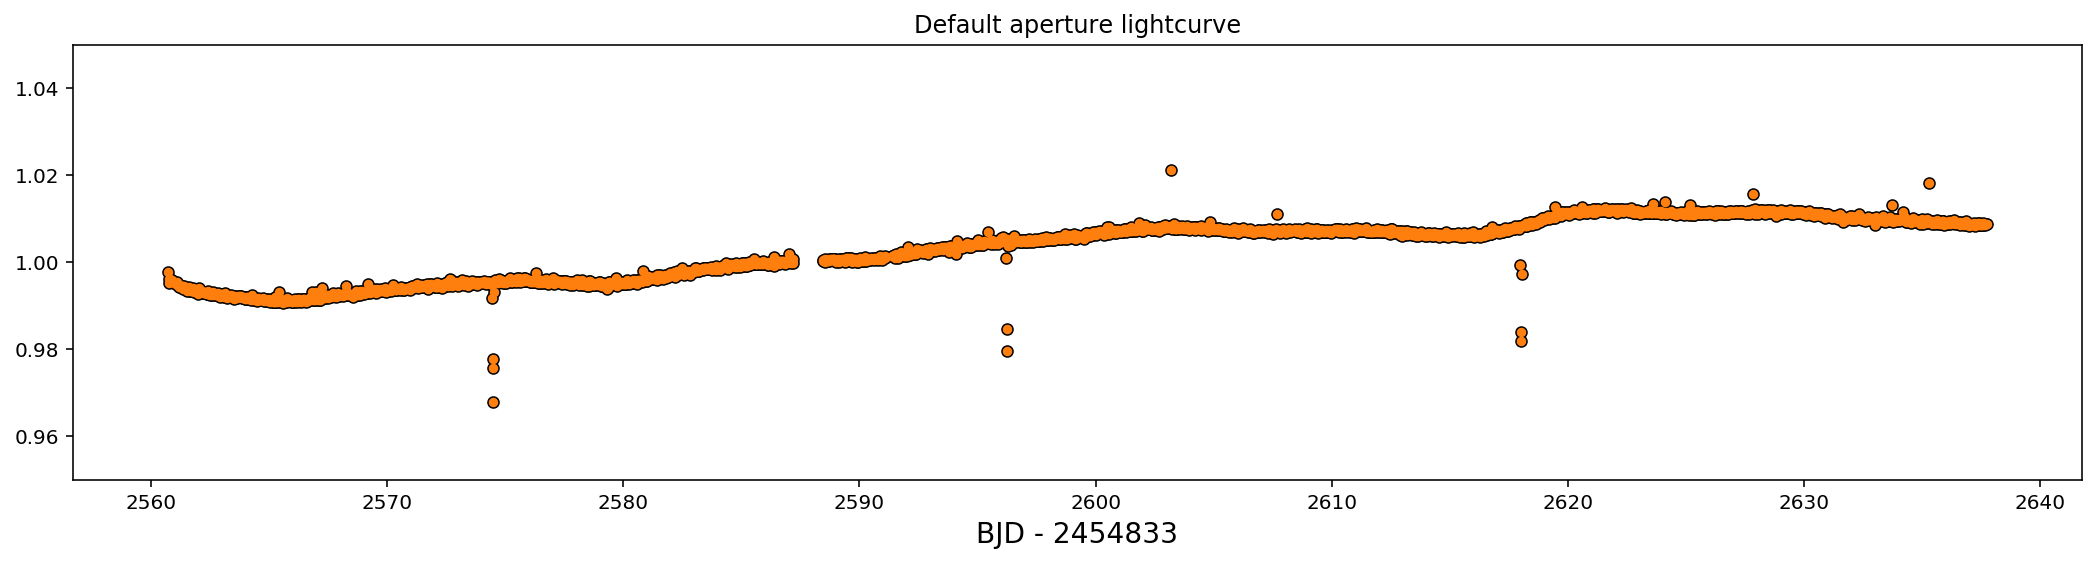

In [14]:
plt.figure(figsize=(18, 4))
plt.scatter(df_llc['BJD - 2454833'], df_llc['Corrected Flux'], marker='o', s=28, edgecolors='k')
plt.scatter(df_llc['BJD - 2454833'], df_llc['Corrected Flux'], marker='o', s=14)
plt.ylim(0.95, 1.05)
plt.xlabel('BJD - 2454833', fontsize=14)
plt.title('Default aperture lightcurve');

In [8]:
! ls ../data/c08/220300000/83386/

hlsp_k2sff_k2_lightcurve_220383386-c08_kepler_v1_llc-default-aper.txt
hlsp_k2sff_k2_lightcurve_220383386-c08_kepler_v1_llc.fits


In [15]:
from astropy.io import fits

In [16]:
hdu = fits.open('../data/c08/220500000/65349/hlsp_k2sff_k2_lightcurve_220565349-c08_kepler_v1_llc.fits')

In [19]:
hdu.info()

Filename: ../data/c08/220500000/65349/hlsp_k2sff_k2_lightcurve_220565349-c08_kepler_v1_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   ()      
  1  BESTAPER      1 BinTableHDU    242   3448R x 6C   [D, D, D, D, I, J]   
  2  CIRC_APER0    1 BinTableHDU    242   3448R x 6C   [D, D, D, D, I, J]   
  3  CIRC_APER1    1 BinTableHDU    242   3448R x 6C   [D, D, D, D, I, J]   
  4  CIRC_APER2    1 BinTableHDU    242   3448R x 6C   [D, D, D, D, I, J]   
  5  CIRC_APER3    1 BinTableHDU    242   3448R x 6C   [D, D, D, D, I, J]   
  6  CIRC_APER4    1 BinTableHDU    242   3448R x 6C   [D, D, D, D, I, J]   
  7  CIRC_APER5    1 BinTableHDU    242   3448R x 6C   [D, D, D, D, I, J]   
  8  CIRC_APER6    1 BinTableHDU    242   3448R x 6C   [D, D, D, D, I, J]   
  9  CIRC_APER7    1 BinTableHDU    242   3448R x 6C   [D, D, D, D, I, J]   
 10  CIRC_APER8    1 BinTableHDU    242   3448R x 6C   [D, D, D, D, I, J]   
 11  CIRC_APER9    1 

In [21]:
hdu['CIRC_APER_TBL'].data.shape # (10, 9, 10)

(10, 9, 10)

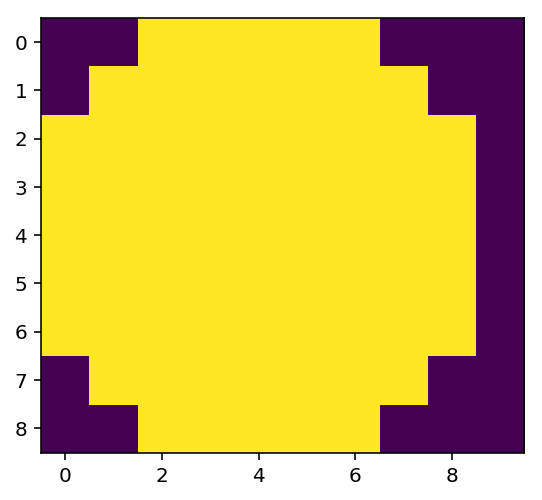

In [27]:
plt.imshow(hdu['CIRC_APER_TBL'].data[5, :, :])

In [28]:
hdu['CIRC_APER_TBL'].data[5,:,7].sum()

7.0

That looks roughly like a 7 pixel diameter circle.

In [29]:
#hdu.info()

In [30]:
hdu['CIRC_APER7'].data['T']

array([ 2560.70334562,  2560.74421022,  2560.76464266, ...,  2637.69011997,
        2637.73098329,  2637.7514151 ])

In [31]:
hdu['CIRC_APER7'].data['FCOR'] #also FRAW

array([ 1.0032919 ,  1.00278868,  1.00024601, ...,  1.00041662,
        1.00082315,  0.99963172])

In [32]:
hdu['CIRC_APER7'].data['T']

array([ 2560.70334562,  2560.74421022,  2560.76464266, ...,  2637.69011997,
        2637.73098329,  2637.7514151 ])

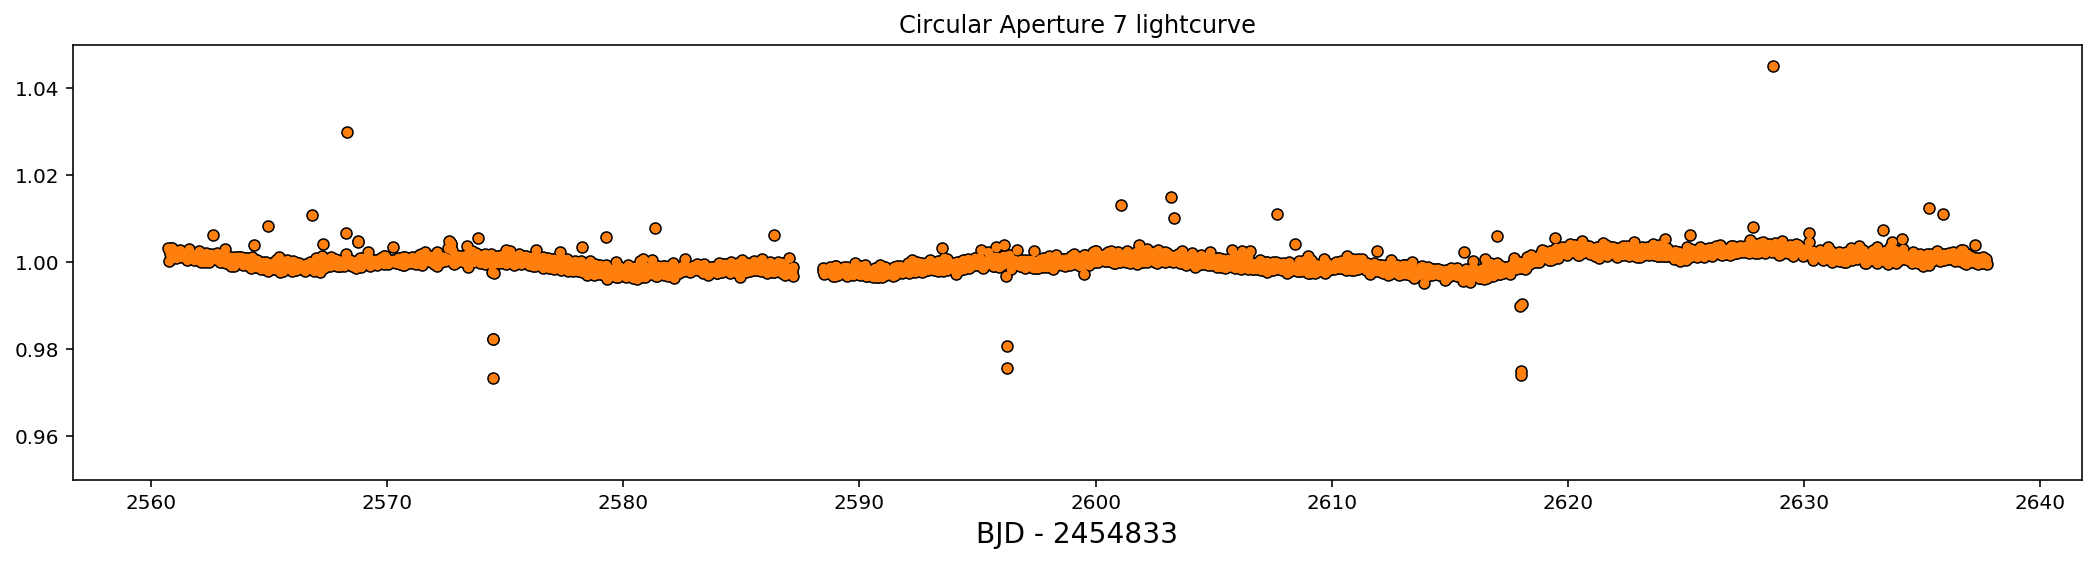

In [34]:
plt.figure(figsize=(18, 4))
#plt.scatter(df_llc['BJD - 2454833'], df_llc['Corrected Flux'], marker='o', s=14)
plt.scatter(hdu['CIRC_APER7'].data['T'], hdu['CIRC_APER7'].data['FCOR'], marker='o', s=28, edgecolors='k')
plt.scatter(hdu['CIRC_APER7'].data['T'], hdu['CIRC_APER7'].data['FCOR'], marker='o', s=14)
plt.ylim(0.95, 1.05)
plt.xlabel('BJD - 2454833', fontsize=14)
plt.title('Circular Aperture 7 lightcurve');

## Comparison to EVEREST

How does this object look in EVEREST?

In [35]:
import everest

In [36]:
star = everest.Everest(220565349)

INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 220565349.


In [37]:
star.aperture.shape

(9, 10)

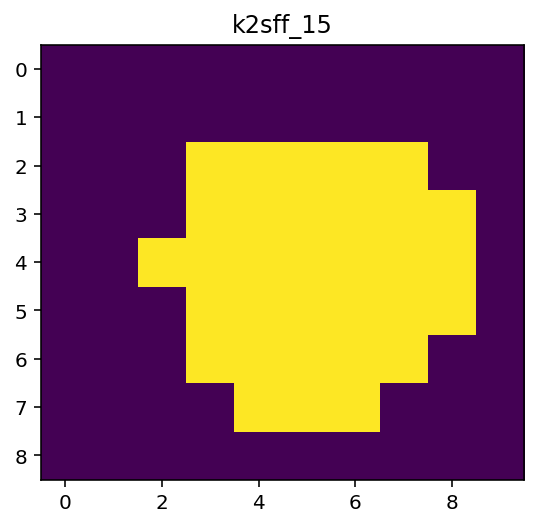

In [38]:
plt.imshow(star.aperture)
plt.title(star.aperture_name);

In [39]:
star.saturated

False

It's a saturated aperture.

In [40]:
star.fcor

array([ 30466.12924491,  30447.98460971,  30455.54337476, ...,
        30496.25471159,  30487.91381342,  30482.60780682])

In [41]:
star.flux

array([ 30362.31704026,  30343.5831455 ,  30350.5549852 , ...,
        30817.18916756,  30808.75683451,  30803.35908741])

In [42]:
star.fraw

array([ 30609.87543011,  30592.64627838,  30595.88432217, ...,
        30554.15148067,  30525.34991264,  30518.62857056])

(0.95, 1.05)

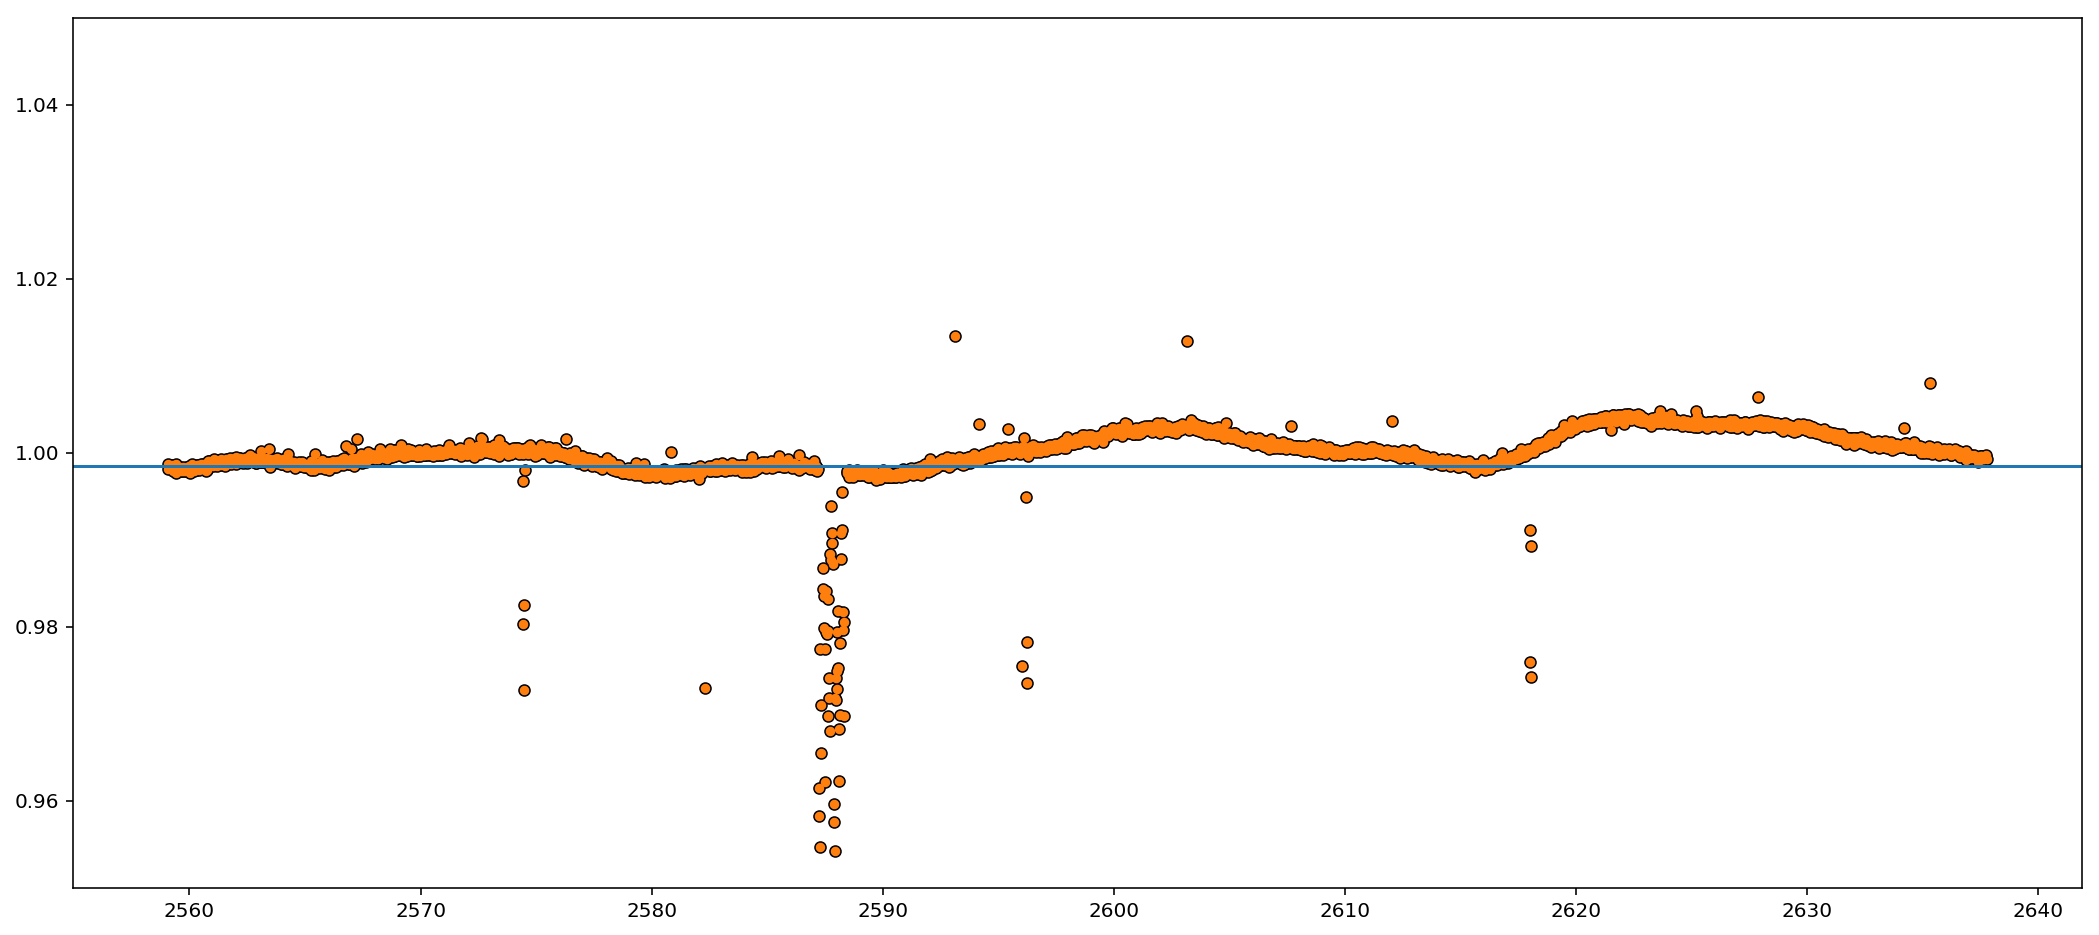

In [44]:
flux = star.fcor
plt.figure(figsize=(18, 8))
plt.scatter(star.time, flux/np.nanmedian(flux), marker='o', s=28, edgecolors='k')
plt.scatter(star.time, flux/np.nanmedian(flux), marker='o', s=14)
plt.axhline(0.9985)
plt.ylim(0.95, 1.05)

The everest pipeline underperforms on this target.

INFO  [everest.basecamp.plot_aperture()]: Plotting the aperture...


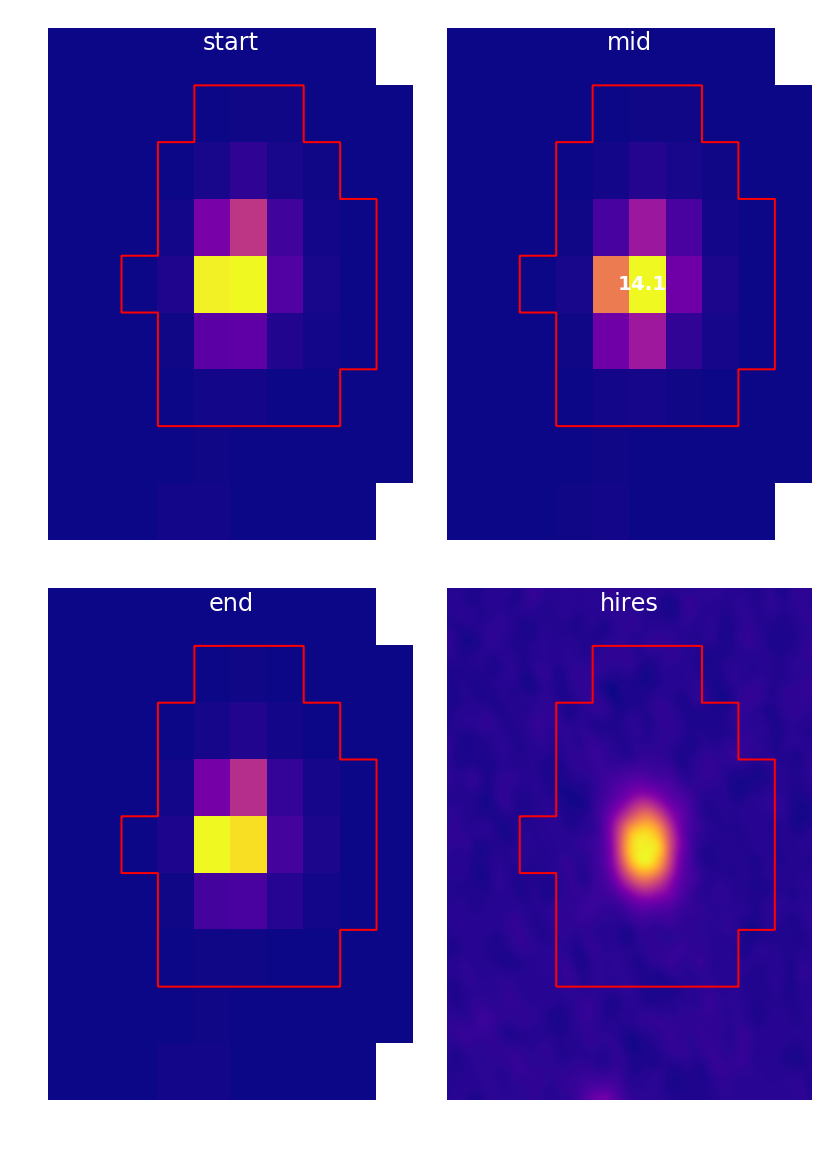

In [45]:
star.plot_aperture()

## Comparison to K2 Pipeline

In [47]:
hduk = fits.open('../data/c08/ktwo220565349-c08_llc.fits')

In [48]:
#hduk.info()

In [49]:
hduk['LIGHTCURVE'].data['PDCSAP_FLUX']

array([            nan,  30157.12304688,  30166.42382812, ...,
        30083.77148438,  30054.49609375,  30050.34570312], dtype=float32)

(0.95, 1.05)

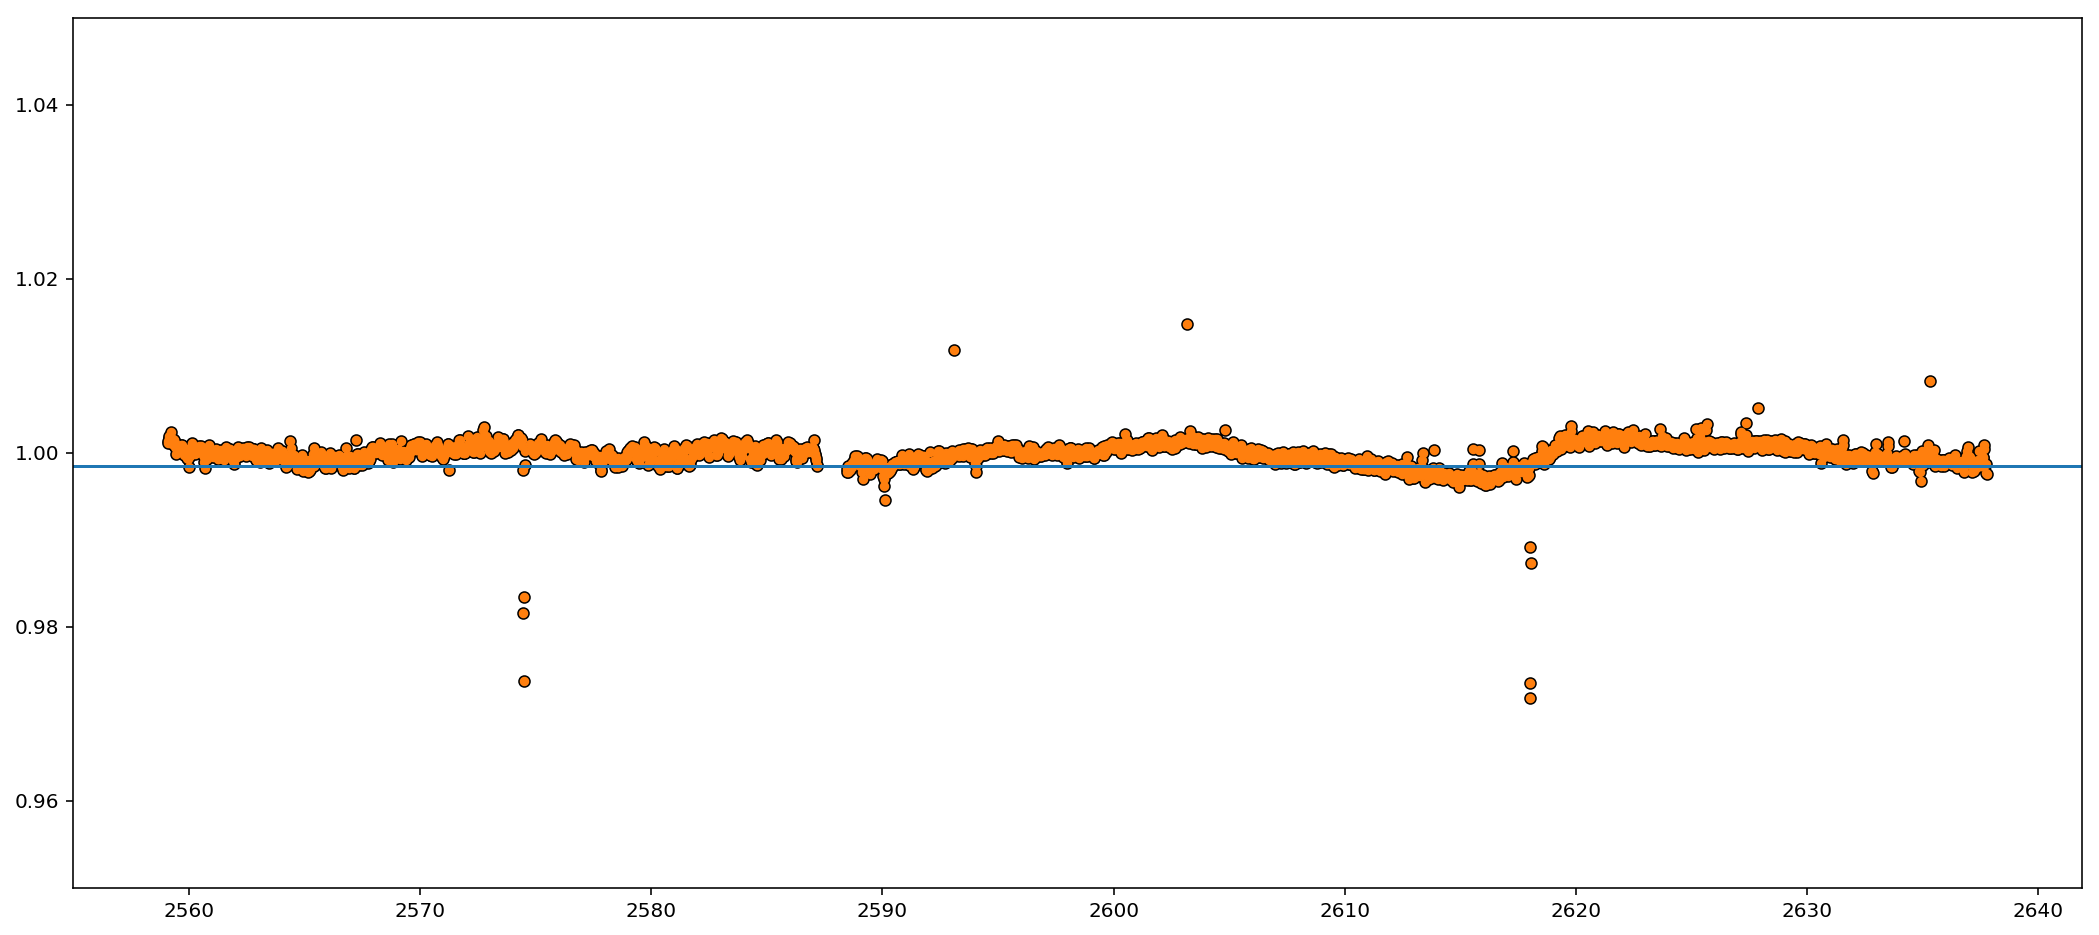

In [52]:
time = hduk['LIGHTCURVE'].data['TIME']
flux = hduk['LIGHTCURVE'].data['PDCSAP_FLUX'] / np.nanmedian(hduk['LIGHTCURVE'].data['PDCSAP_FLUX'])
plt.figure(figsize=(18, 8))
plt.scatter(time, flux, marker='o', s=28, edgecolors='k')
plt.scatter(time, flux, marker='o', s=14)
plt.axhline(0.9985)
plt.ylim(0.95, 1.05)

## What about the reprocessed data?

### KSOP-2856

In [ ]:
#! ls /soc/nfs/test-nfs5/ksop-2856-c8-cosmic-ray-turned-off/lcv/ | head -n 10

In [ ]:
hduk2856 = fits.open('/soc/nfs/test-nfs5/ksop-2856-c8-cosmic-ray-turned-off/lcv/ktwo220383386-c08_llc.fits')

### KSOP-2912

In [ ]:
hduk2912 = fits.open('/soc/nfs/test-nfs5/ksop-2912-c8-new-cr-threshold/archive_ksop2912/lcv/ktwo220383386-c08_llc.fits')

### KSOP-2961

In [ ]:
hduk2961 = fits.open('/soc/nfs/production-nfs5/ksop-2961-C8-Dynablack-On/exports/lcv/ktwo220383386-c08_llc.fits')

In [ ]:
time = hduk['LIGHTCURVE'].data['TIME']
flux1 = hduk['LIGHTCURVE'].data['PDCSAP_FLUX']
flux2= hduk2856['LIGHTCURVE'].data['PDCSAP_FLUX']
plt.figure(figsize=(18, 8))
plt.scatter(time, flux1, marker='o', s=14, alpha=0.5)
plt.scatter(time, flux2, marker='o', s=14, alpha=0.5)
#plt.axhline(0.9985)
#plt.ylim(0.996, 1.0010)

In [ ]:
#plt.imshow(hduk['APERTURE'].data);
#plt.imshow(hduk2856['APERTURE'].data);
#plt.imshow(hduk2912['APERTURE'].data);

In [ ]:
plt.imshow(hduk2961['APERTURE'].data);

In [ ]:
(np.alltrue(hduk2912['APERTURE'].data == hduk['APERTURE'].data) &
 np.alltrue(hduk2961['APERTURE'].data == hduk['APERTURE'].data) &
 np.alltrue(hduk2856['APERTURE'].data == hduk['APERTURE'].data) )

The Apertures all have the same size.

In [ ]:
time = hduk['LIGHTCURVE'].data['TIME']
flux1 = hduk['LIGHTCURVE'].data['SAP_FLUX']
flux2= hduk2856['LIGHTCURVE'].data['SAP_FLUX']
flux3= hduk2912['LIGHTCURVE'].data['SAP_FLUX']
flux4= hduk2961['LIGHTCURVE'].data['SAP_FLUX']

In [ ]:
plt.figure(figsize=(18, 8))
plt.scatter(time, (flux1-flux2)/flux1, marker='o', s=14)
plt.scatter(time, (flux1-flux4)/flux1, marker='o', s=14)
#plt.axhline(0.9985)
#plt.ylim(0.996, 1.0010)

In [ ]:
plt.figure(figsize=(8,8))
vec2 = (flux1-flux2)/flux1
vec3 = (flux1-flux3)/flux1
vec4 = (flux1-flux4)/flux1
plt.hist(vec3[vec3==vec3], bins=np.arange(-0.001, 0.001, 0.0001), alpha=0.5)
plt.hist(vec2[vec2==vec2], bins=np.arange(-0.001, 0.001, 0.0001) , alpha=0.5)
plt.hist(vec4[vec4==vec4], bins=np.arange(-0.001, 0.001, 0.0001) , alpha=0.5)
plt.yscale('log');

# Not much different